<a href="https://colab.research.google.com/github/Royal92-prog/virus_test/blob/main/PCR_test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Q1
#Assume that the data is on the drive
drive.mount('/content/gdrive')
df= pd.read_csv('gdrive/My Drive/virus_data.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,patient_id,age,sex,weight,blood_type,address,current_location,job,num_of_siblings,happiness_score,...,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,risk,spread,covid
0,9454,26.0,M,109.9,O+,07791 Nelson Mountains Apt. 220\nLake Jennifer...,"('33.41012', '-91.06177')","Presenter, broadcasting",2.0,6.0,...,131.131165,8.0,17.146052,4.577239,3.157098,0.604181,6.0,High,Low,False
1,9657,16.0,F,34.7,A+,"748 Barnett Union\nBensonbury, NH 58511","('55.62047', '37.49338')",Print production planner,2.0,8.0,...,171.135863,3.0,1.891541,-9.881538,-1.315507,8.737819,4.0,High,Low,True
2,4658,14.0,M,57.1,AB+,"7424 Andrew Throughway\nEast Karina, IA 53085","('40.65538', '-74.38987')",NaN,2.0,9.0,...,85.790478,2.0,-1.619890,-4.069062,-1.184209,3.333429,3.0,Low,High,True
3,10495,5.0,M,25.8,A+,404 Christopher Prairie Suite 392\nSandersview...,"('32.5007', '-94.74049')",NaN,2.0,9.0,...,266.829714,4.0,4.849942,-18.282947,-1.470706,NaN,6.0,Low,Low,True
4,14475,10.0,F,38.4,B+,"1507 Gomez Creek Apt. 816\nBrandyville, MO 21265","('45.47885', '133.42825')",NaN,3.0,5.0,...,94.114375,2.0,-2.290169,-20.622331,NaN,-3.147700,6.0,Low,Low,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2496,10.0,F,31.3,B+,"890 Marquez Rue Apt. 584\nMaxwellchester, FL 7...","('-6.48167', '106.85417')",NaN,3.0,6.0,...,232.658869,1.0,-3.948926,NaN,-0.192454,7.365231,6.0,Low,Low,False
2996,7371,8.0,F,32.2,A+,"5921 Melissa Stream Apt. 436\nWest Joseph, VT ...","('41.55947', '14.66737')",NaN,2.0,9.0,...,120.771016,1.0,-5.621624,11.944807,10.101528,-1.817661,5.0,Low,Low,False
2997,11281,14.0,F,45.0,A+,NaN,"('-7.60361', '37.00438')",NaN,2.0,9.0,...,195.966114,0.0,-9.421494,-10.398387,-1.535022,3.563476,5.0,High,Low,True
2998,7124,8.0,F,36.1,A+,"8610 Michael Shore\nNorth Susanfort, AZ 64724","('32.65246', '51.67462')",NaN,2.0,7.0,...,24.662261,3.0,-0.555831,-4.352281,-2.155413,NaN,5.0,Low,Low,True


In [ ]:
#splitting the data into training and test sets
X_train,X_test= train_test_split(df,test_size=0.2,random_state=10,shuffle=False)

In [ ]:
#converting all unique blood_types/symptoms to OHE features and removing blood_type feature
encoded_blood_types = pd.get_dummies(X_train['blood_type'])
encoded_symptoms = X_train['symptoms'].str.get_dummies(sep=';')
X_train = pd.concat([X_train.drop(['blood_type','symptoms'], axis = 1), encoded_blood_types,encoded_symptoms], axis=1)

# Extract separate features from the Address column using regular expressions
import re
pattern = r'(\d+)\s*([A-Za-z\s]+),\s*([A-Z]{2})\s*(\d+)$'
X_train[['zipAdd', 'street', 'state', 'zipcode']] = X_train['address'].str.extract(pattern)



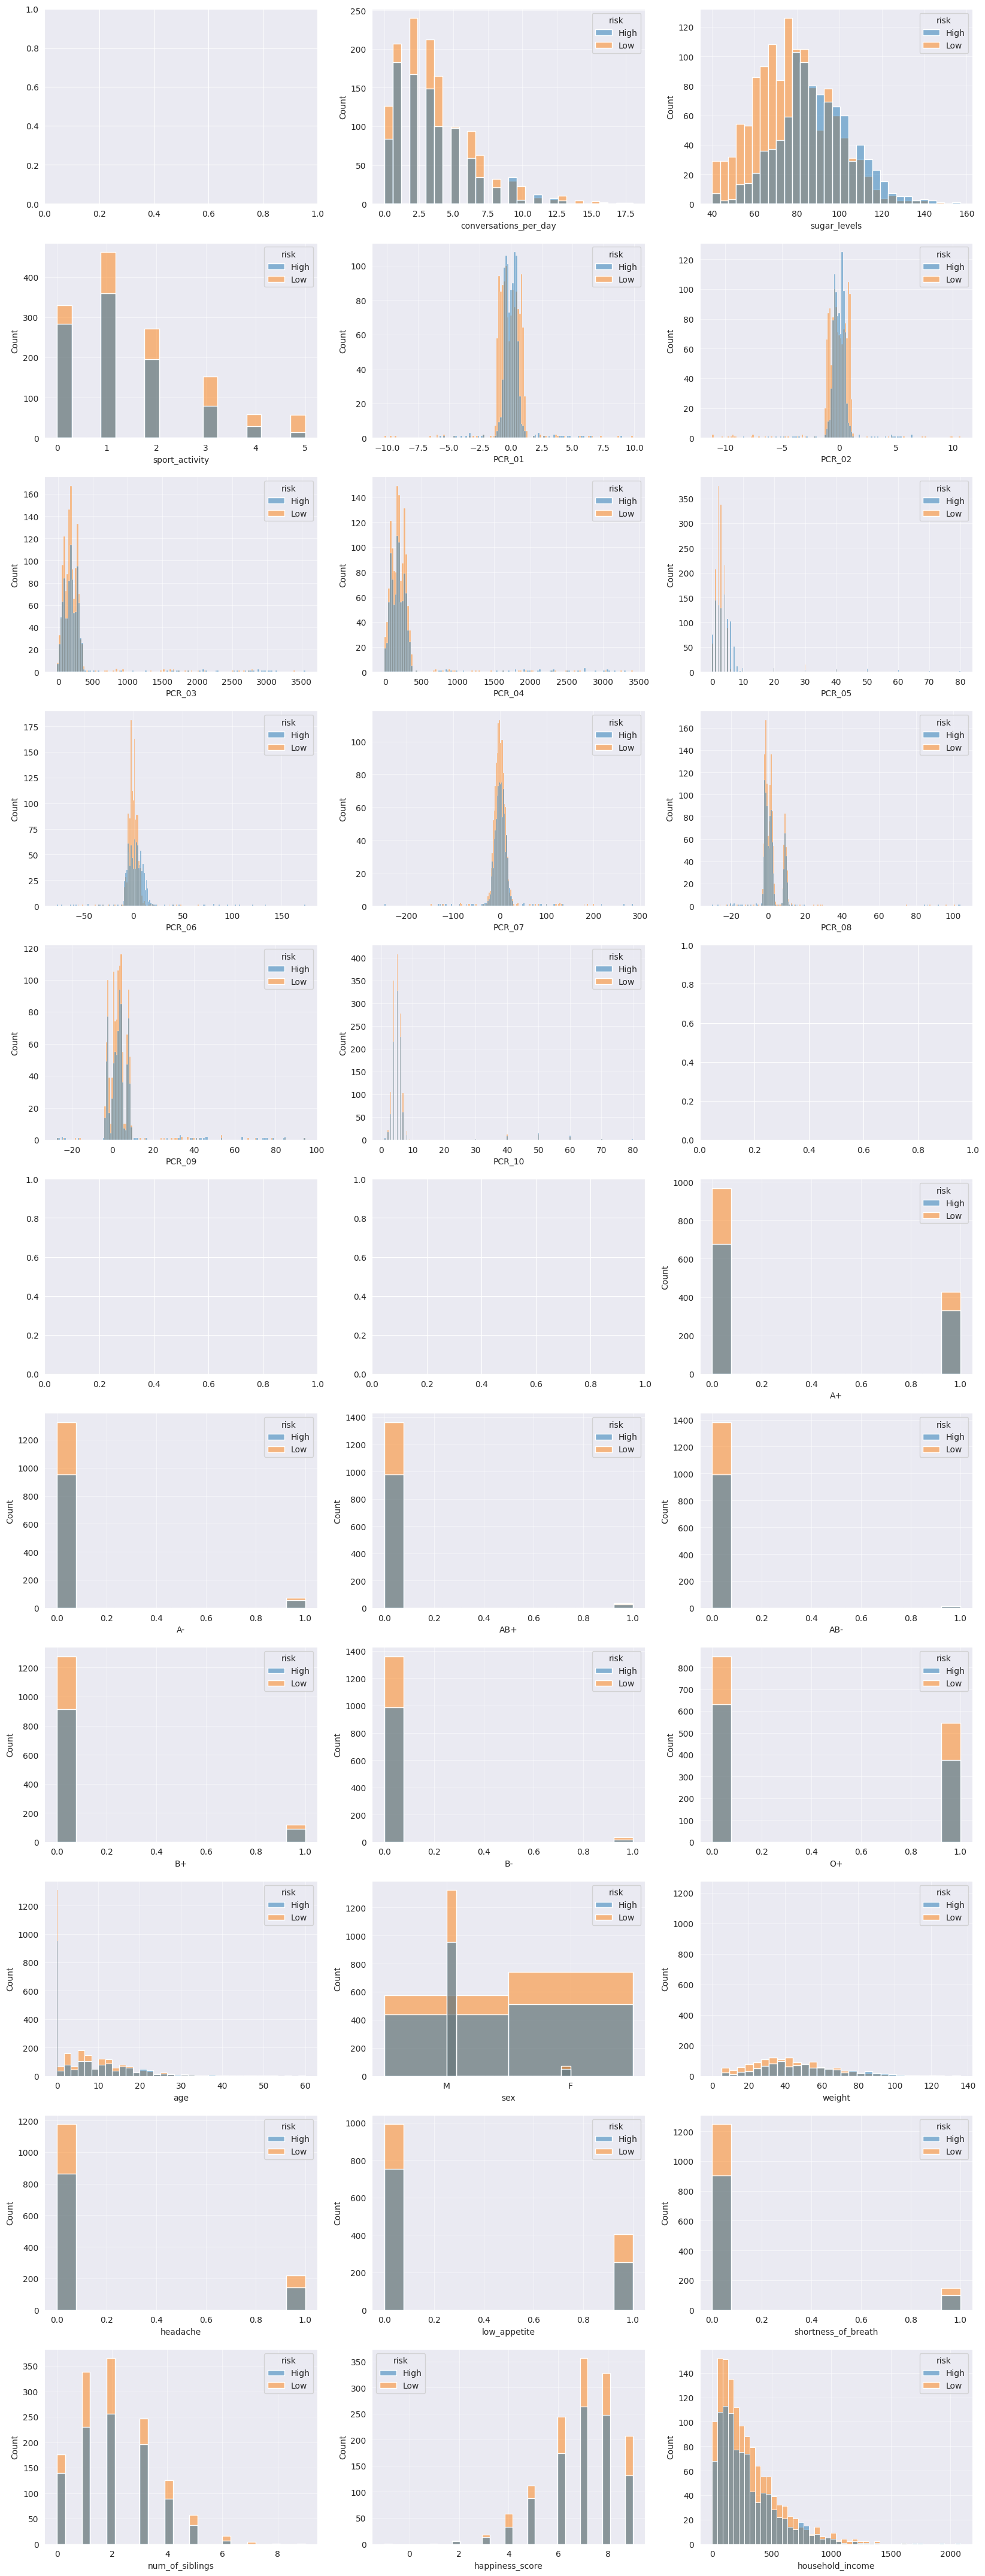

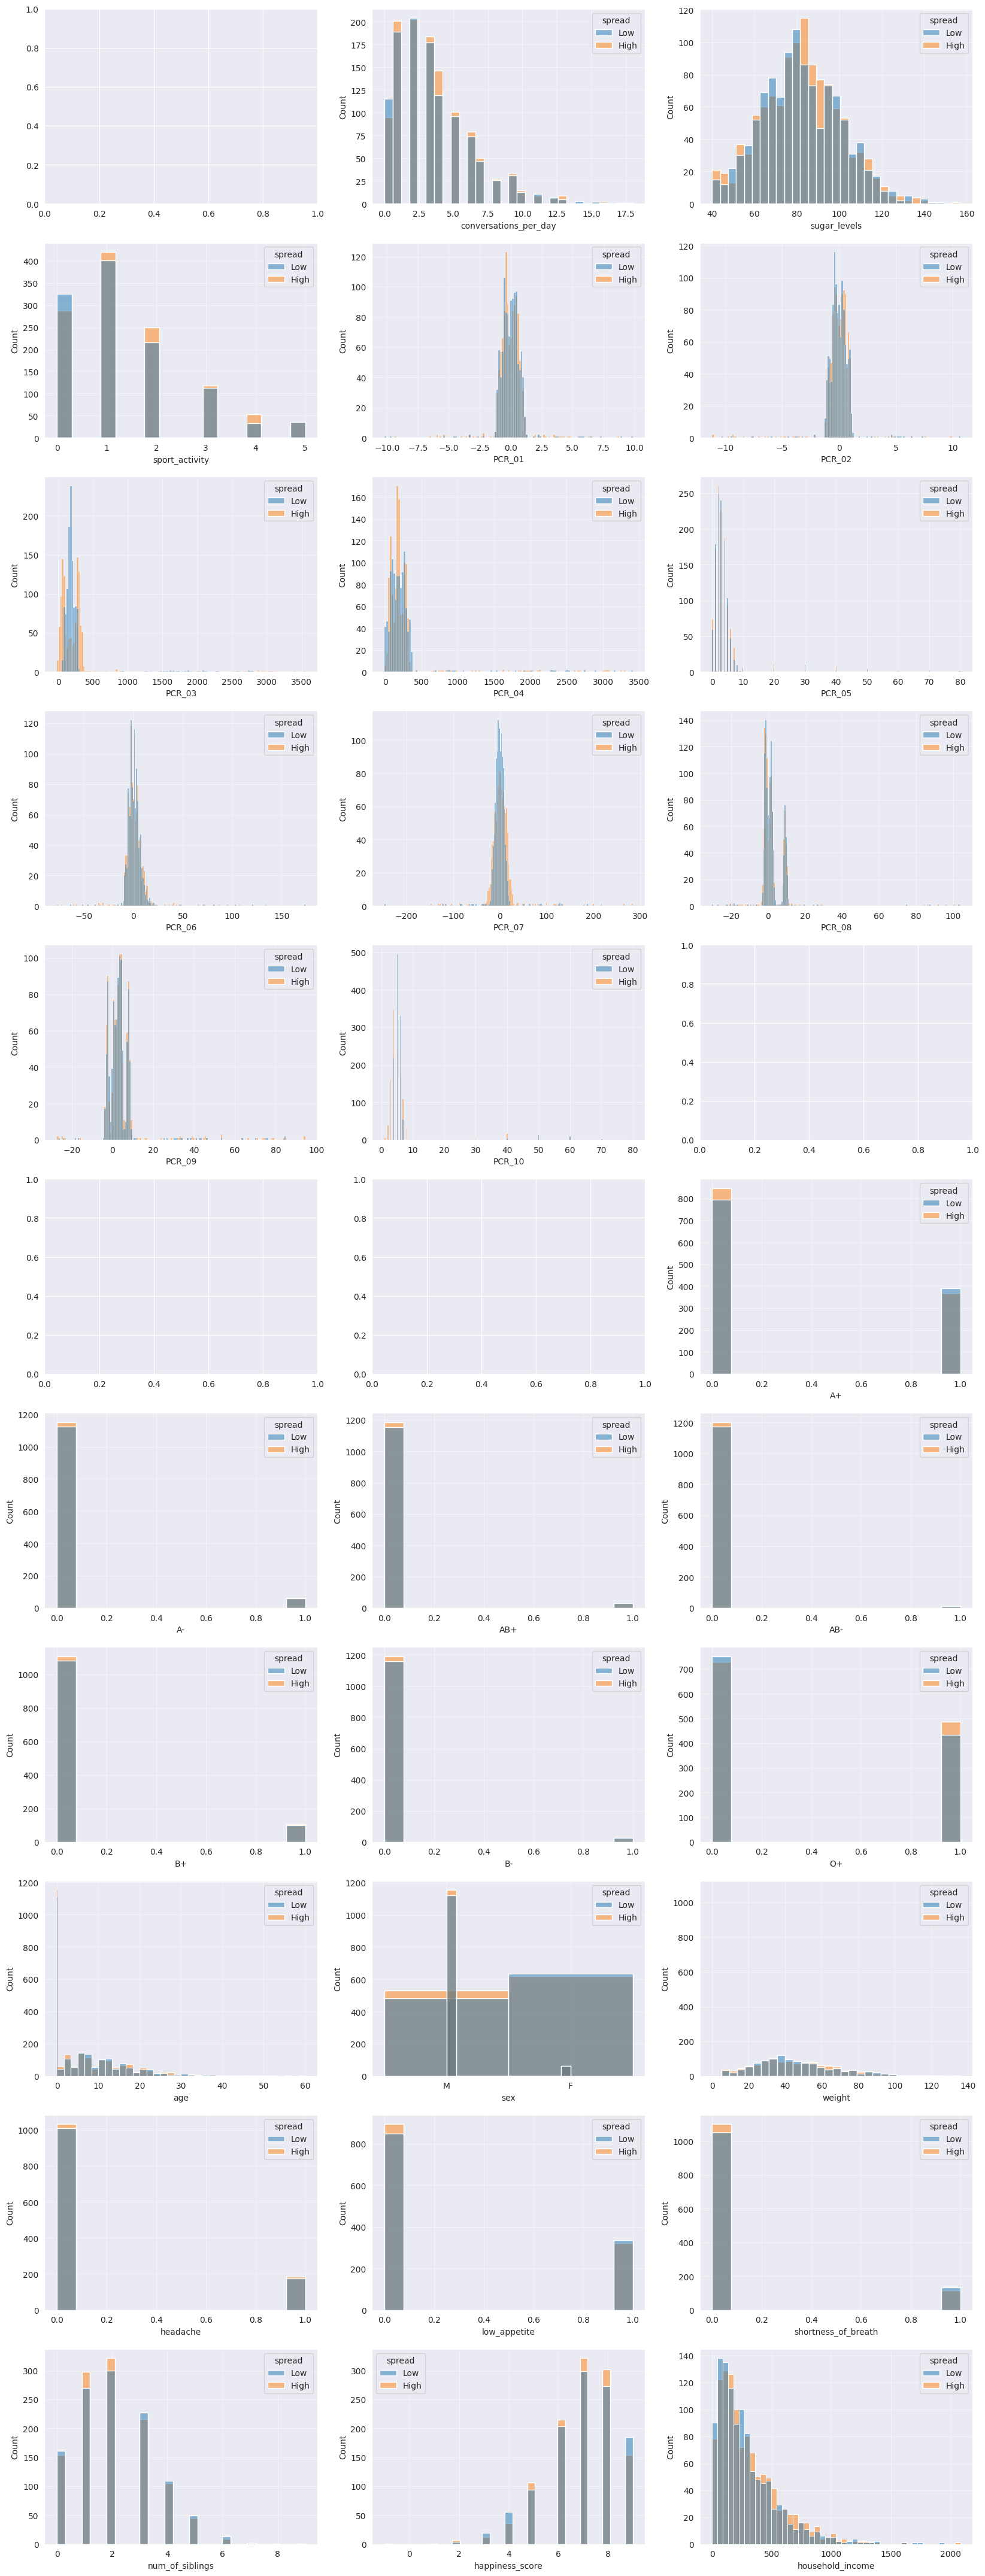

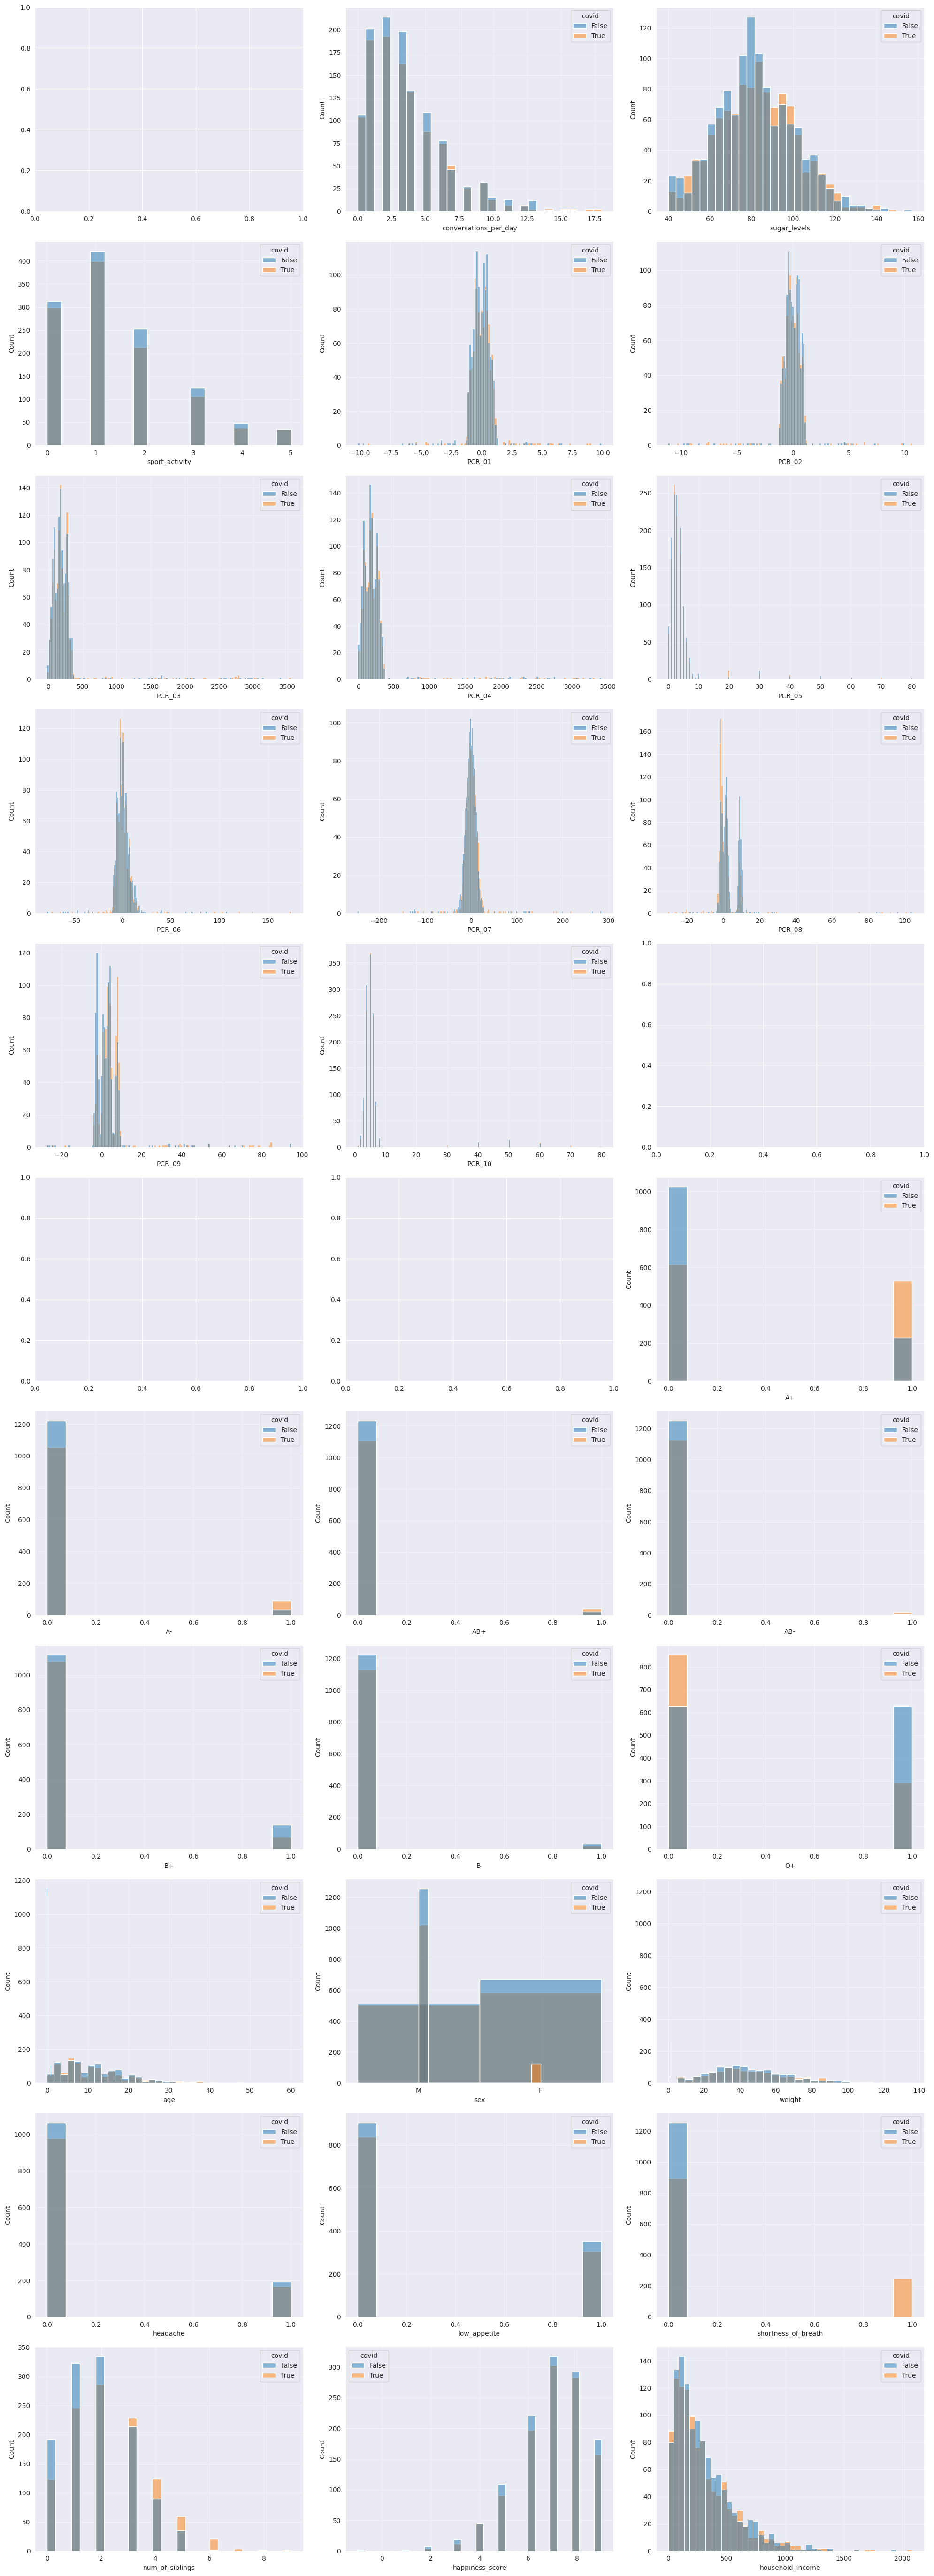

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''This operation generates histograms to visualize the distribution of each numerical feature in relation to three target features: covid, risk, and spread.
Each histogram represents the distribution of a specific numerical feature with respect to one of the target features.'''

forbidden = ["address", 'street', 'state', 'zipcode', 'job', 'zipAdd', 'symptoms', 'pcr_date', 'patient_id', 'current_location']
targets = ["risk", "spread", "covid"]

COLS = 3
ROWS = int(np.ceil((len(X_train.columns) - len(forbidden) - 3) / COLS))

for target in targets:
    _, axes = plt.subplots(ROWS, COLS, figsize=(20, 5 * ROWS))
    for index, feature in enumerate(X_train.columns):
        if feature in forbidden or feature in targets:
            continue
        row = (index - len(forbidden)) // COLS
        col = (index - len(forbidden)) % COLS
        sns.histplot(ax=axes[row, col], data=X_train, x=feature, hue=target)
        axes[row, col].grid(alpha=0.5)

plt.tight_layout()


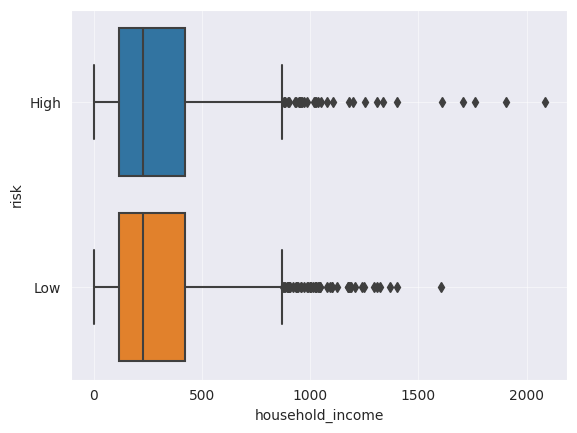

In [ ]:
#A box plot of household_income by the risk label. inspecting outliers informativity.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="household_income",y="risk",data = X_train)
plt.grid(alpha=0.5)

In [ ]:
#Replaces all negative values in the discrete_features columns of the X_train with nan
discrete_features = ["sugar_levels","sport_activity","weight","num_of_siblings","happiness_score","conversations_per_day"]
X_train[discrete_features] = X_train[discrete_features].where(X_train[discrete_features] >= 0, np.nan)

#Setting weight outliers for each age groups under 10
#X_train.loc[X_train["age"] <= 9, "weight"] = X_train.loc[X_train["age"] <= 9, "weight"].apply(lambda x: 0.65 * x if x > 5 else 0.3 * x)

#outliers pairs cleaning implementation,graphs printings are for self analysis
relations = [["age", ['weight', 'sugar_levels'], 1.5], ['sugar_levels', ['weight'], 1.5]]

for relation in relations:
    feature = relation[0]
    related_features = relation[1]
    threshold = relation[2]

    for related_feature in related_features:
        q1 = X_train[feature].quantile(0.25)
        q3 = X_train[feature].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        X_train.loc[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound), related_feature] = np.nan

#cleaning all PCR outliers of problematic dates
import datetime
PCRS=['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10']

date_start = datetime.datetime(2020, 5, 22)
date_end = datetime.datetime(2020, 6, 8)
X_train["pcr_date"] = pd.to_datetime(X_train["pcr_date"])

X_train.loc[(X_train["pcr_date"] >= date_start) & (X_train["pcr_date"] <= date_end), PCRS] = np.nan


In [ ]:
#Replace all nan values with random num in (0,9)
from random import randrange
X_train["num_of_siblings"] = X_train["num_of_siblings"].fillna(randrange(0, 9))

# age median imputation
X_train["age"].fillna(X_train["age"].median(), inplace=True)

def imputePerAgeGroup(trainDf, string):
    trainDf[string].fillna(trainDf.groupby("age")[string].transform("median"), inplace=True)
    return trainDf

def imputeMedian(trainDf, string):
    trainDf[string].fillna(trainDf[string].median(), inplace=True)
    return trainDf

X_train = imputePerAgeGroup(X_train, "sugar_levels")
X_train = imputePerAgeGroup(X_train, "weight")
X_train = imputeMedian(X_train, "happiness_score")
X_train = imputeMedian(X_train, "conversations_per_day")
X_train = imputeMedian(X_train, "household_income")
X_train = imputeMedian(X_train, "sport_activity")

# sex - random sample imputation
X_train.loc[(X_train["sex"] != 'M') & (X_train["sex"] != 'F'), "sex"] = X_train.loc[(X_train["sex"] != 'M') & (X_train["sex"] != 'F'), "sex"].apply(lambda x: random.choice(['M', 'F']))

#State code Random imputation
import random
def random_sample_imputation(df, column, unique_values):
    missing_indices = df.loc[df[column].isnull() | (df[column] == ''), column].index
    if len(unique_values) > 0:
        df.loc[missing_indices, column] = random.choice(unique_values)
    return df

X_train = random_sample_imputation(X_train, "state", X_train.loc[(X_train["state"].notnull()) & (X_train["state"] != ''), "state"].unique())
X_train = random_sample_imputation(X_train, "pcr_date", X_train.loc[(X_train["pcr_date"].notnull()) & (X_train["pcr_date"] != ''), "pcr_date"].unique())
X_train = random_sample_imputation(X_train, "zipAdd", X_train.loc[(X_train["zipAdd"].notnull()) & (X_train["zipAdd"] != ''), "zipAdd"].unique())

#missingImputation of All pcr's  by median sample method
for i in PCRS:
    X_train[i].fillna(X_train[i].median(), inplace=True)


<ipython-input-233-c2136b2fa3df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(X_train.corr(),fignum= f.number)


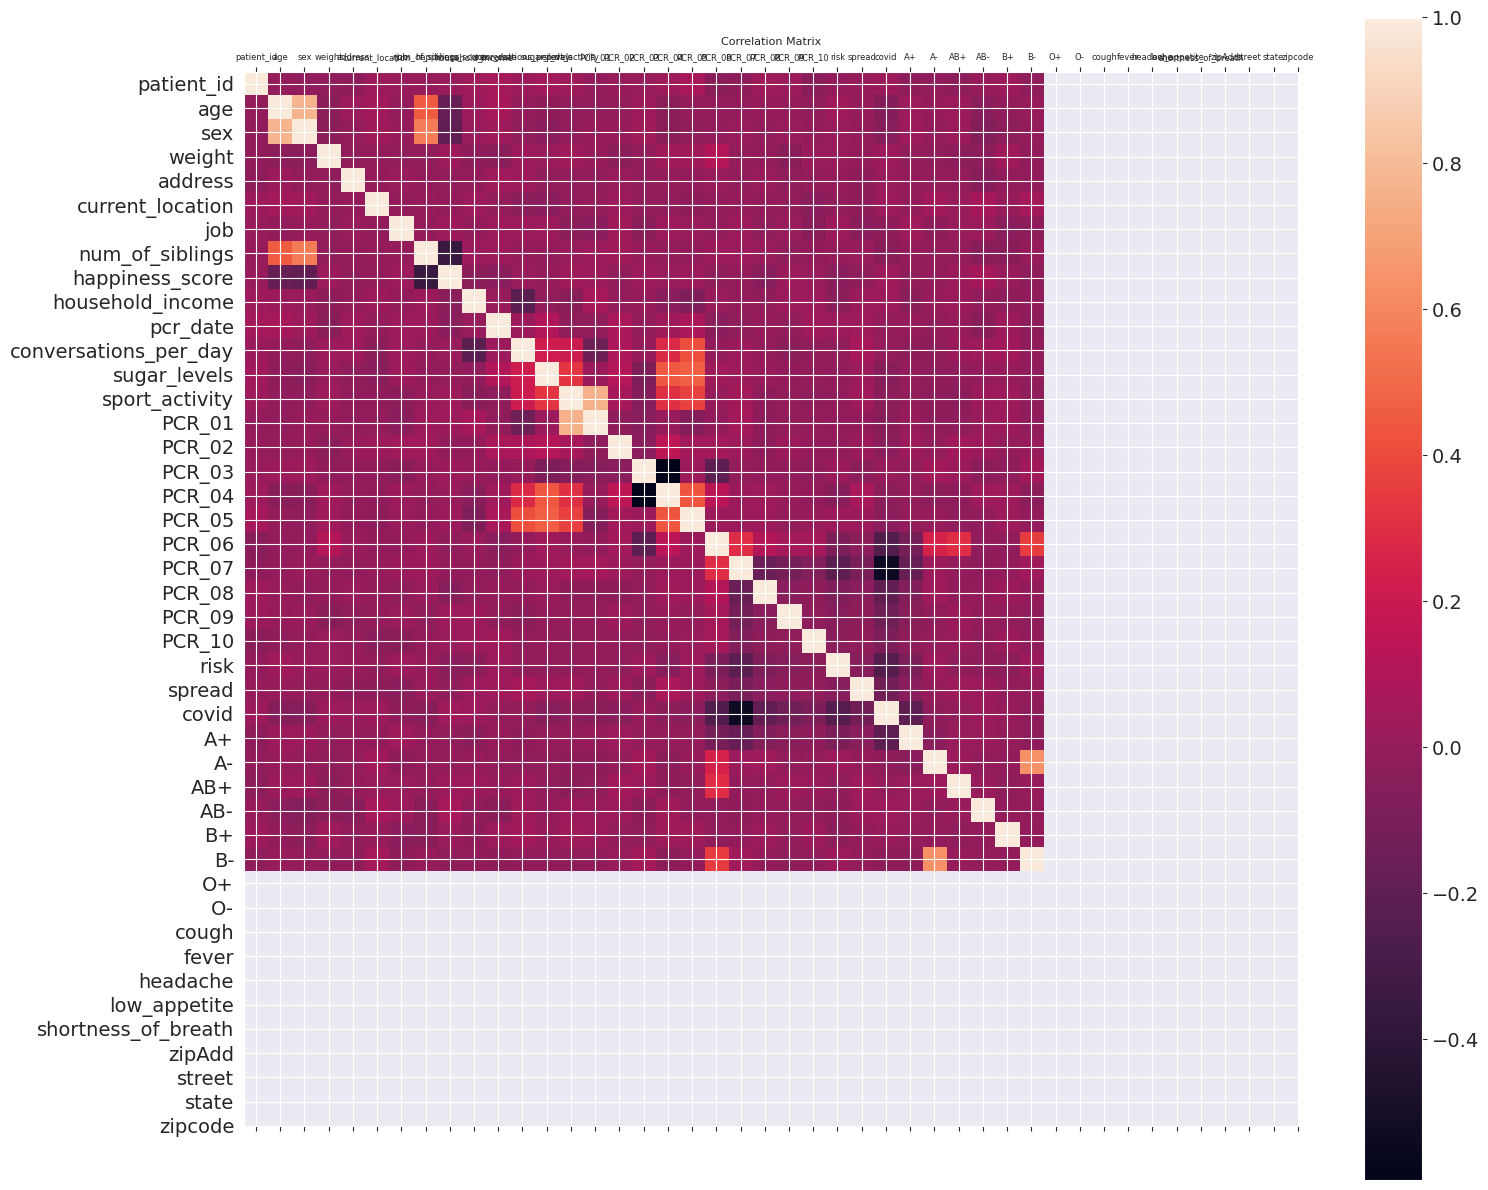

In [ ]:
#Heat map
f = plt.figure(figsize=(17, 15))
plt.matshow(X_train.corr(),fignum= f.number)
plt.xticks(range(len(X_train.columns)),X_train.columns, fontsize=6)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=8);
plt.show()

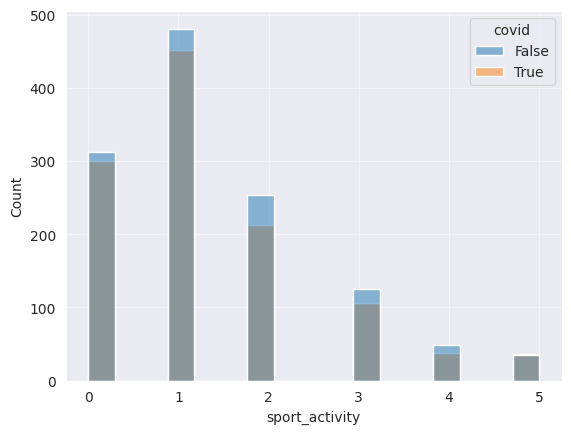

In [ ]:
#
sns.histplot(data=X_train ,x = 'sport_activity' ,hue="covid")
plt.grid(alpha=0.5)


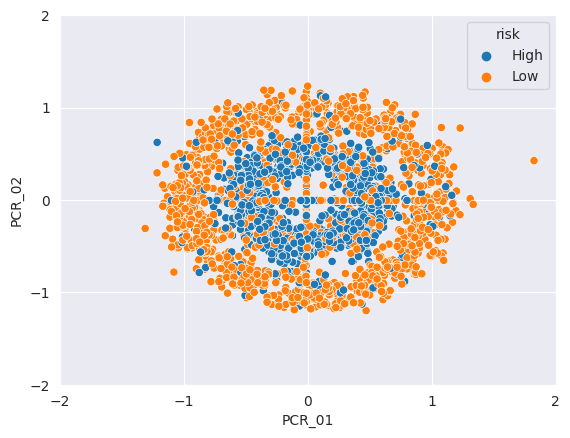

In [ ]:
import seaborn as sns

x_values = [-2, -1, 0, 1, 2]
y_values = [-2, -1, 0, 1, 2]

filtered_data = X_train[
    (X_train["PCR_01"].between(min(x_values), max(x_values))) &
    (X_train["PCR_02"].between(min(y_values), max(y_values)))
]

sns.scatterplot(data=filtered_data, x="PCR_01", y="PCR_02", hue="risk")
plt.xticks(x_values)
plt.yticks(y_values)
plt.show()


In [ ]:
#converting all target labels and sex into numerical
X_train["sex"].replace("M",np.float64(0),inplace = True)
X_train["sex"].replace("F",np.float64(1),inplace = True)
X_train["risk"].replace("Low",np.float64(0),inplace = True)
X_train["risk"].replace("High",np.float64(1),inplace = True)
X_train["spread"].replace("High",np.float64(1),inplace = True)
X_train["spread"].replace("Low",np.float64(0),inplace = True)
X_train["covid"] = X_train["covid"].astype(int)
X_train["risk"] = X_train["risk"].astype(int)
X_train["spread"] = X_train["spread"].astype(int)

#dropping all uninformative features:
X_train.drop(columns=[
    "patient_id",
    "PCR_06","street","zipcode","state",
    "current_location","address","job",
    "symptoms","happiness_score","household_income",
    "sex","zipAdd","pcr_date"]
    ,inplace = True)


KeyError: ignored

In [ ]:

#various analysis by decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
X = X_train.copy(deep = True)
Y = X_train[["covid"]]#,,"risk","spread"
X.drop(columns=["covid","risk","spread"],inplace = True)#
X_tr, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
#for i in range(3,70,2):
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr,y_train)
arr = []
tempArr = clf.feature_importances_
print("depth is :: ",clf.tree_.max_depth)
for j in range(len(tempArr)):
    arr.append([X.columns[j],tempArr[j]])
arr = sorted(arr, key=lambda x: x[1])

X_train